# Network Visualization in PyPSA

This tutorial covers how to visualize PyPSA networks using various plotting functions. We'll learn how to create static and interactive visualizations of network components, flows, and results.

## Basic Network Plotting

First, let's create a simple network to visualize:

In [1]:
import pypsa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create network
network = pypsa.Network()
network.set_snapshots(pd.date_range("2024-01-01", periods=24, freq="H"))

# Add buses with coordinates
for i in range(3):
    network.add(
        "Bus",
        f"bus {i}",
        v_nom=20.0,
        x=i,  # x-coordinate
        y=i   # y-coordinate
    )

# Add components
network.add("Carrier", "gas")
network.add("Carrier", "solar")

network.add(
    "Generator",
    "gas_plant",
    bus="bus 0",
    p_nom=100,
    carrier="gas"
)

network.add(
    "Generator",
    "solar",
    bus="bus 1",
    p_nom=50,
    carrier="solar"
)

network.add(
    "Load",
    "load",
    bus="bus 2",
    p_set=50
)

for i in range(3):
    network.add(
        "Line",
        f"line_{i}",
        bus0=f"bus {i}",
        bus1=f"bus {(i + 1) % 3}",
        s_nom=100
    )

C:\Users\User\AppData\Local\Temp\ipykernel_2308\1122010578.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  network.set_snapshots(pd.date_range("2024-01-01", periods=24, freq="H"))


## Basic Network Plot

Let's create a basic plot of the network:

d:\PyPSA\PyPSA\.venv\Lib\site-packages\cartopy\mpl\feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


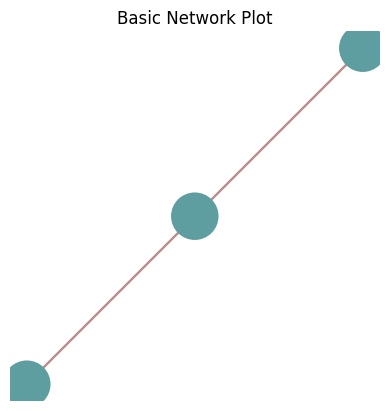

In [2]:
# Create a basic network plot
network.plot()
plt.title("Basic Network Plot")
plt.show()

## Customized Network Plot

We can customize the plot with different colors, sizes, and labels:

d:\PyPSA\PyPSA\.venv\Lib\site-packages\cartopy\mpl\feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


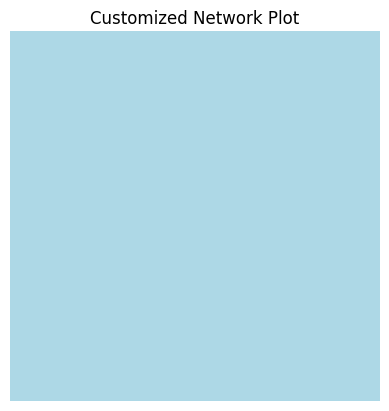

In [3]:
# Create a customized network plot
network.plot(
    bus_sizes=1000,  # Size of bus markers
    line_widths=2,   # Width of lines
    bus_colors='lightblue',  # Color of buses
    line_colors='gray',      # Color of lines
    title='Customized Network Plot'
)
plt.show()

## Plotting with Geographic Data

PyPSA can also plot networks on geographic maps. Let's create a network with geographic coordinates:

C:\Users\User\AppData\Local\Temp\ipykernel_2308\587617215.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  network_geo.set_snapshots(pd.date_range("2024-01-01", periods=24, freq="H"))
d:\PyPSA\PyPSA\.venv\Lib\site-packages\cartopy\mpl\feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


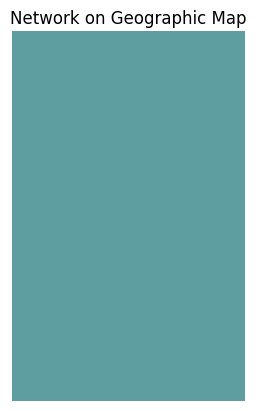

In [4]:
# Create a network with geographic coordinates
network_geo = pypsa.Network()
network_geo.set_snapshots(pd.date_range("2024-01-01", periods=24, freq="H"))

# Add buses with geographic coordinates (example: cities in Germany)
buses = {
    "Berlin": (13.4050, 52.5200),
    "Hamburg": (9.9937, 53.5511),
    "Munich": (11.5820, 48.1351)
}

for city, (lon, lat) in buses.items():
    network_geo.add(
        "Bus",
        city,
        v_nom=20.0,
        x=lon,
        y=lat
    )

# Add components
network_geo.add("Carrier", "gas")
network_geo.add("Carrier", "solar")

network_geo.add(
    "Generator",
    "gas_plant",
    bus="Berlin",
    p_nom=100,
    carrier="gas"
)

network_geo.add(
    "Generator",
    "solar",
    bus="Munich",
    p_nom=50,
    carrier="solar"
)

network_geo.add(
    "Load",
    "load",
    bus="Hamburg",
    p_set=50
)

# Add lines between cities
cities = list(buses.keys())
for i in range(len(cities)):
    network_geo.add(
        "Line",
        f"line_{i}",
        bus0=cities[i],
        bus1=cities[(i + 1) % len(cities)],
        s_nom=100
    )

# Plot on a map
network_geo.plot(
    title='Network on Geographic Map',
    color_geomap=True,  # Show geographic background
    bus_sizes=1000,
    line_widths=2
)
plt.show()

## Plotting Time Series Data

We can also visualize time series data from the network:

INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network <pypsa.networks.SubNetwork object at 0x00000224C8DD12B0> for snapshots DatetimeIndex(['2024-01-01 00:00:00', '2024-01-01 01:00:00',
               '2024-01-01 02:00:00', '2024-01-01 03:00:00',
               '2024-01-01 04:00:00', '2024-01-01 05:00:00',
               '2024-01-01 06:00:00', '2024-01-01 07:00:00',
               '2024-01-01 08:00:00', '2024-01-01 09:00:00',
               '2024-01-01 10:00:00', '2024-01-01 11:00:00',
               '2024-01-01 12:00:00', '2024-01-01 13:00:00',
               '2024-01-01 14:00:00', '2024-01-01 15:00:00',
               '2024-01-01 16:00:00', '2024-01-01 17:00:00',
               '2024-01-01 18:00:00', '2024-01-01 19:00:00',
               '2024-01-01 20:00:00', '2024-01-01 21:00:00',
               '2024-01-01 22:00:00', '2024-01-01 23:00:00'],
              dtype='datetime64[ns]', name='snapshot', freq='h')


<Figure size 1000x600 with 0 Axes>

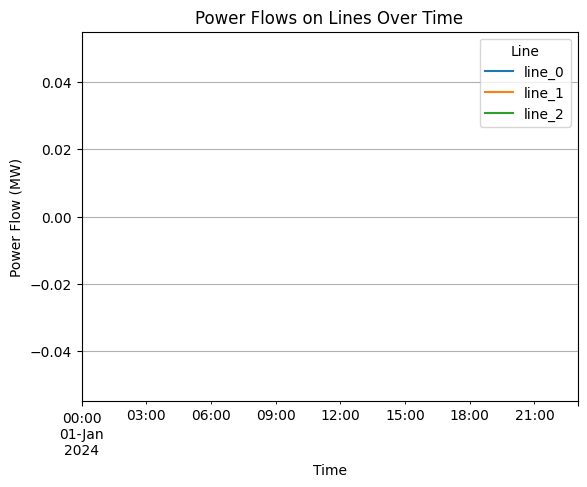

In [5]:
# Solve power flow
network.pf()

# Plot power flows over time
plt.figure(figsize=(10, 6))
network.lines_t.p0.plot()
plt.title('Power Flows on Lines Over Time')
plt.xlabel('Time')
plt.ylabel('Power Flow (MW)')
plt.legend(title='Line')
plt.grid(True)
plt.show()

## Plotting Component Statistics

We can visualize statistics about network components:

IndexError: index 0 is out of bounds for axis 0 with size 0

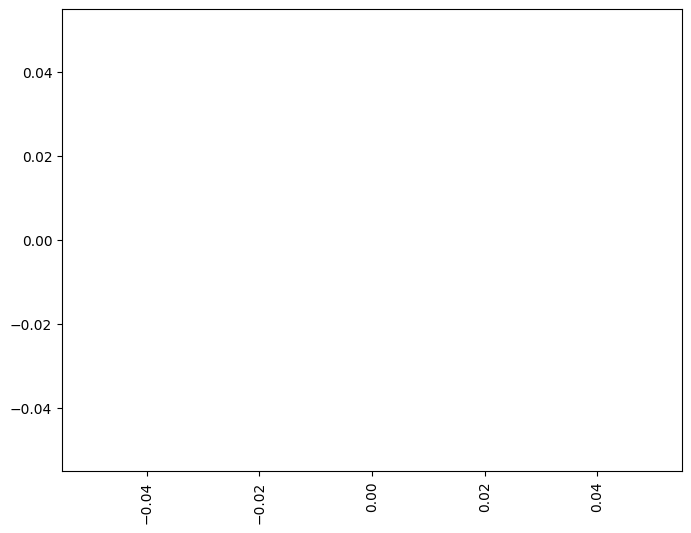

In [6]:
# Calculate and plot generator statistics
gen_stats = network.statistics.supply()

plt.figure(figsize=(8, 6))
gen_stats.plot(kind='bar')
plt.title('Generator Statistics')
plt.xlabel('Generator')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Plotting Options

Key plotting options in PyPSA:

1. **Basic Options**
   - `bus_sizes`: Size of bus markers
   - `line_widths`: Width of transmission lines
   - `bus_colors`: Color of buses
   - `line_colors`: Color of lines
   - `title`: Plot title

2. **Geographic Options**
   - `color_geomap`: Show geographic background
   - `geomap`: Specify map style
   - `boundaries`: Set map boundaries

3. **Component Options**
   - `show_generators`: Show generator locations
   - `show_loads`: Show load locations
   - `show_storage`: Show storage locations

## Next Steps

In the next tutorial, we'll learn how to perform network optimization and analyze the results.